In [112]:
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy.lang.en import English

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# Text - visualization
from wordcloud import WordCloud, STOPWORDS 

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [113]:
location_training = r'C:\Users\Admin\Anaconda3\DS-PYTHON\Datasets\sentiment.csv'


In [115]:
data_training = pd.read_csv(location_training,  encoding="utf8")
data_training.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [116]:
# Keeping only the neccessary columns
data_training = data_training[['text','sentiment']]

In [96]:
data_training.shape


(13871, 2)

In [117]:
# Split into train and test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)
train, test = train_test_split(data_training, test_size = 0.10, random_state =0)

In [118]:
# check the discreet values of the sentiment columns
train.sentiment.value_counts()

Negative    7674
Neutral     2799
Positive    2010
Name: sentiment, dtype: int64

In [119]:
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [100]:
# separate the Positive and Negative tweets of the training set in order to easily visualize 
# their contained words. 

# clean the text from hashtags, mentions and links. 

# Now they were ready for a WordCloud visualization which shows only the most emphatic words 
# of the Positive and Negative tweets.

In [120]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']

train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [121]:
train_pos.shape

(2010,)

In [122]:
train_neg.shape

(7674,)

In [123]:
data_training.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [124]:
# positive text
# words = ' '.join(data_training.text)
words_pos = ' '.join(train_pos)

In [110]:
type(words_pos)

str

In [125]:
cleaned_word_pos = " ".join([word for word in words_pos.split()
                                    if 'http' not in word
                                        and not word.startswith('@')
                                        and not word.startswith('#')
                                        and word != 'RT'
                            ])

In [126]:
# cleaned_word

In [127]:
wordcloud_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(cleaned_word_pos)

Positive words


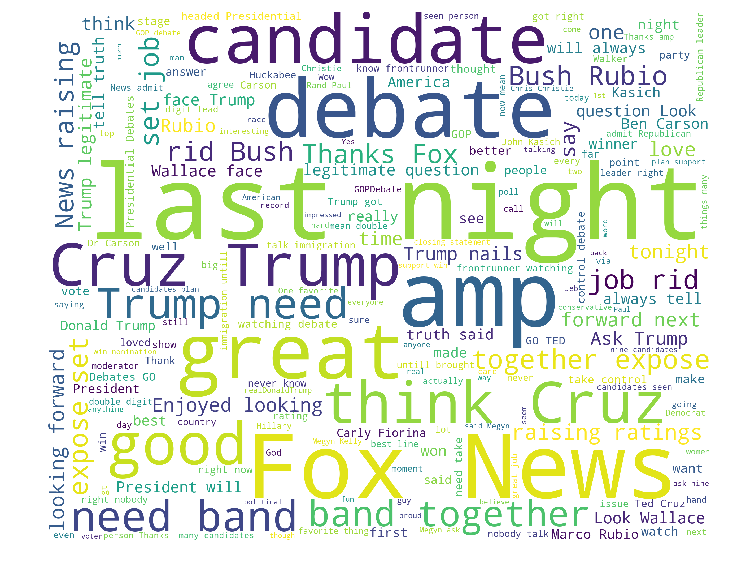

In [128]:
# plot the WordCloud image   
print("Positive words")
plt.figure(figsize = (10, 14), facecolor = None) 
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [129]:
# Positive tweets
# Interesting to notice the following words and expressions in the positive word set: 
# truth, strong, legitimate, together, love, job

In [130]:
# Negative text
# words = ' '.join(data_training.text)
words_neg= ' '.join(train_neg)

In [131]:
# words_neg

In [132]:
cleaned_word_neg = " ".join([word for word in words_neg.split()
                                    if 'http' not in word
                                        and not word.startswith('@')
                                        and not word.startswith('#')
                                        and word != 'RT'
                            ])

In [133]:
wordcloud_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                     ).generate(cleaned_word_neg)

Negative words


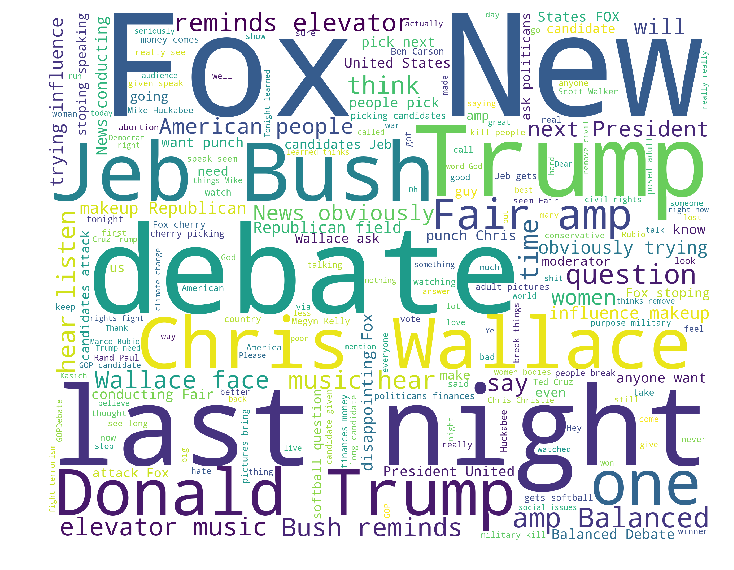

In [134]:
# plot the WordCloud image   
print("Negative words")
plt.figure(figsize = (10, 14), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [ ]:
# Negative tweets
# negative tweets contains words like: influence, news, elevator music, disappointing, softball, 
# makeup, cherry picking, trying